# Ielādē pakotnes

In [73]:
# Parastās
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

# Interneta pakotnes
import requests
from bs4 import BeautifulSoup

# Novelc info par visam partijām

In [2]:
# Galvenā lapa
url = 'https://epv2024.cvk.lv/velesanu-rezultati'
raw = requests.get(url)
decoded = raw.content.decode()
soup = BeautifulSoup(decoded, features='html.parser')

# Saites katrai partijai
saites = []
found = False
for element in soup.findAll('td'):
    if found:
        for a in element.find_all('a', href=True):
            saite = a['href']
            saites.append(saite)
            print(saite)
        
    if element.has_attr('class'):
        if element['class'][0] == 'text-start':
            found = True
        else:
            found = False
    else:
        found = False

/velesanu-rezultati/saraksti/saskana-socialdemokratiska-partija
/velesanu-rezultati/saraksti/jkp-jauna-konservativa-partija
/velesanu-rezultati/saraksti/nacionala-apvieniba-visu-latvijai-tevzemei-un-brivibai-lnnk
/velesanu-rezultati/saraksti/latvija-pirmaja-vieta
/velesanu-rezultati/saraksti/latvijas-attistibai
/velesanu-rezultati/saraksti/centra-partija
/velesanu-rezultati/saraksti/apvieniba-jaunlatviesi
/velesanu-rezultati/saraksti/apvienotais-saraksts-latvijas-zala-partija-latvijas-regionu-apvieniba-liepajas-partija
/velesanu-rezultati/saraksti/progresivie
/velesanu-rezultati/saraksti/politiska-partija-tautas-varas-speks
/velesanu-rezultati/saraksti/kustiba-par
/velesanu-rezultati/saraksti/suverena-vara
/velesanu-rezultati/saraksti/tauta-zeme-valstiskums
/velesanu-rezultati/saraksti/zalo-un-zemnieku-savieniba
/velesanu-rezultati/saraksti/jauna-vienotiba
/velesanu-rezultati/saraksti/politiska-partija-stabilitatei


# Novelc info par katru partiju

In [3]:
# Deklarē vārdnīcu
rezultati = {
    s.split('/')[-1]:{
        'Kandidāts':[],
        'Kārtas nr. sarakstā':[],
        'Plusi':[],
        'Svītrojumi':[],
        'Balsis':[],
        'Vietas nr.':[],
        'Ievēlēts':[]
    } for s in saites
}
rezultati_kopa = []

# Rezultāti katrai partijai
for saite in saites:
    url = f"https://epv2024.cvk.lv{saite}"
    raw = requests.get(url)
    decoded = raw.content.decode()
    soup = BeautifulSoup(decoded, features='html.parser')
    partija = saite.split('/')[-1]
    print(partija)
    
    # Ielasi datus
    col_index = 0
    elements = soup.find_all('td')
    for i,element in enumerate(elements):
        hrefs = element.find_all('a', href=True)
        if len(hrefs) > 0:
            rezultati[partija]['Kandidāts'].append(hrefs[0].contents[0].strip())
            rezultati[partija]['Kārtas nr. sarakstā'].append(elements[i+1].contents[0])
            rezultati[partija]['Plusi'].append(int(elements[i+2].contents[0].contents[0].replace(' ','')))
            rezultati[partija]['Svītrojumi'].append(int(elements[i+3].contents[0].contents[0].replace(' ','')))
            rezultati[partija]['Balsis'].append(int(elements[i+4].contents[0].contents[0].replace(' ','')))
            rezultati[partija]['Vietas nr.'].append(elements[i+5].contents[0])
            try:
                rezultati[partija]['Ievēlēts'].append(elements[i+6].contents[0])
            except:
                rezultati[partija]['Ievēlēts'].append('')
                
    # Izveido tabulu
    df = pd.DataFrame.from_dict(rezultati[partija])
    df['Partija'] = partija
    df = df[['Partija']+list(df.columns)[:-1]]
    rezultati_kopa.append(df)

saskana-socialdemokratiska-partija
jkp-jauna-konservativa-partija
nacionala-apvieniba-visu-latvijai-tevzemei-un-brivibai-lnnk
latvija-pirmaja-vieta
latvijas-attistibai
centra-partija
apvieniba-jaunlatviesi
apvienotais-saraksts-latvijas-zala-partija-latvijas-regionu-apvieniba-liepajas-partija
progresivie
politiska-partija-tautas-varas-speks
kustiba-par
suverena-vara
tauta-zeme-valstiskums
zalo-un-zemnieku-savieniba
jauna-vienotiba
politiska-partija-stabilitatei


# Eksportē

In [6]:
# Izveido
df_out = pd.concat(rezultati_kopa).reset_index(drop=True)

# Secini dzimti pēc vārda
dzimte = []

for k in df_out['Kandidāts']:
    vards = k.split(' ')[0]
    
    # Izņēmumi
    if k == 'Ņikita Piņins':
        dzimte.append('vīriešu')
    elif k == 'Naomi Farbere':
        dzimte.append('sieviešu')
    else:
        
        # Pārējie
        if vards[-1] in ['s','š']:
            dzimte.append('vīriešu')
        elif vards[-1] in ['e','a']:
            dzimte.append('sieviešu')
        else:
            print(k)

df_out['Dzimte'] = dzimte

df_out.to_csv('rezultati.csv')
df_out

,Partija,Kandidāts,Kārtas nr. sarakstā,Plusi,Svītrojumi,Balsis,Vietas nr.,Ievēlēts,Dzimte
0,saskana-socialdemokratiska-partija,Nils Ušakovs,1,24265,1080,60281,1,Ievēlēts,vīriešu
1,saskana-socialdemokratiska-partija,Olga Petkeviča,2,8248,1113,44231,2,,sieviešu
2,saskana-socialdemokratiska-partija,Regīna Ločmele,3,7777,1383,43490,3,,sieviešu
3,saskana-socialdemokratiska-partija,Anna Vladova,10,2566,1290,38372,4,,sieviešu
4,saskana-socialdemokratiska-partija,Igors Pimenovs,12,2165,1270,37991,5,,vīriešu
...,...,...,...,...,...,...,...,...,...
266,politiska-partija-stabilitatei,Jeļena Aferonoka,6,1110,248,11169,7,,sieviešu
267,politiska-partija-stabilitatei,Vjačeslavs Ciganovs,7,1076,262,11121,8,,vīriešu
268,politiska-partija-stabilitatei,Santa Škarste,11,996,282,11021,9,,sieviešu
269,politiska-partija-stabilitatei,Daiga Kameņeva,8,946,273,10980,10,,sieviešu


# Vizualizācijas

In [58]:
# Savāc datus
data_sieviešu = []
data_vīriešu = []
zimes = []
for row_index in range(df_out.shape[0]):
    current_row = df_out.iloc[row_index]
    if current_row['Kandidāts'] in dzimte_sieviešu:
        data_sieviešu.append(current_row['Svītrojumi']/(current_row['Plusi']+current_row['Svītrojumi']))
    else:
        assert current_row['Kandidāts'] in dzimte_vīriešu, 'Kandidāts nepareizs'
        data_vīriešu.append(current_row['Svītrojumi']/(current_row['Plusi']+current_row['Svītrojumi']))
    zimes.append(current_row['Plusi']+current_row['Svītrojumi'])

# Krāsas
krāsas = {p:plt.get_cmap('tab20')(i/20) for i,p in enumerate(np.unique(df_out['Partija']))}

In [65]:
df_out.sort_values(by='Svītrojumi')[-10:]

,Partija,Kandidāts,Kārtas nr. sarakstā,Plusi,Svītrojumi,Balsis,Vietas nr.,Ievēlēts,Dzimte
257,jauna-vienotiba,Didzis Šēnbergs,17,1207,11248,120522,16,,vīriešu
253,jauna-vienotiba,Uģis Rotbergs,18,1823,11259,121127,12,,vīriešu
248,jauna-vienotiba,Janīna Kursīte,15,6719,12008,125274,7,,sieviešu
245,jauna-vienotiba,Dace Melbārde,5,16520,12076,135007,4,,sieviešu
251,jauna-vienotiba,Zanda Kalniņa-Lukaševica,8,4197,12517,122243,10,,sieviešu
244,jauna-vienotiba,Inese Vaidere,4,29146,12634,147075,3,,sieviešu
38,nacionala-apvieniba-visu-latvijai-tevzemei-un-...,Ināra Mūrniece,2,26136,15273,125721,3,,sieviešu
53,nacionala-apvieniba-visu-latvijai-tevzemei-un-...,Kaspars Gerhards,7,2812,15849,101821,18,,vīriešu
259,jauna-vienotiba,Jānis Reirs,7,6099,17891,118771,18,,vīriešu
247,jauna-vienotiba,Arturs Krišjānis Kariņš,2,33984,33963,130584,6,,vīriešu


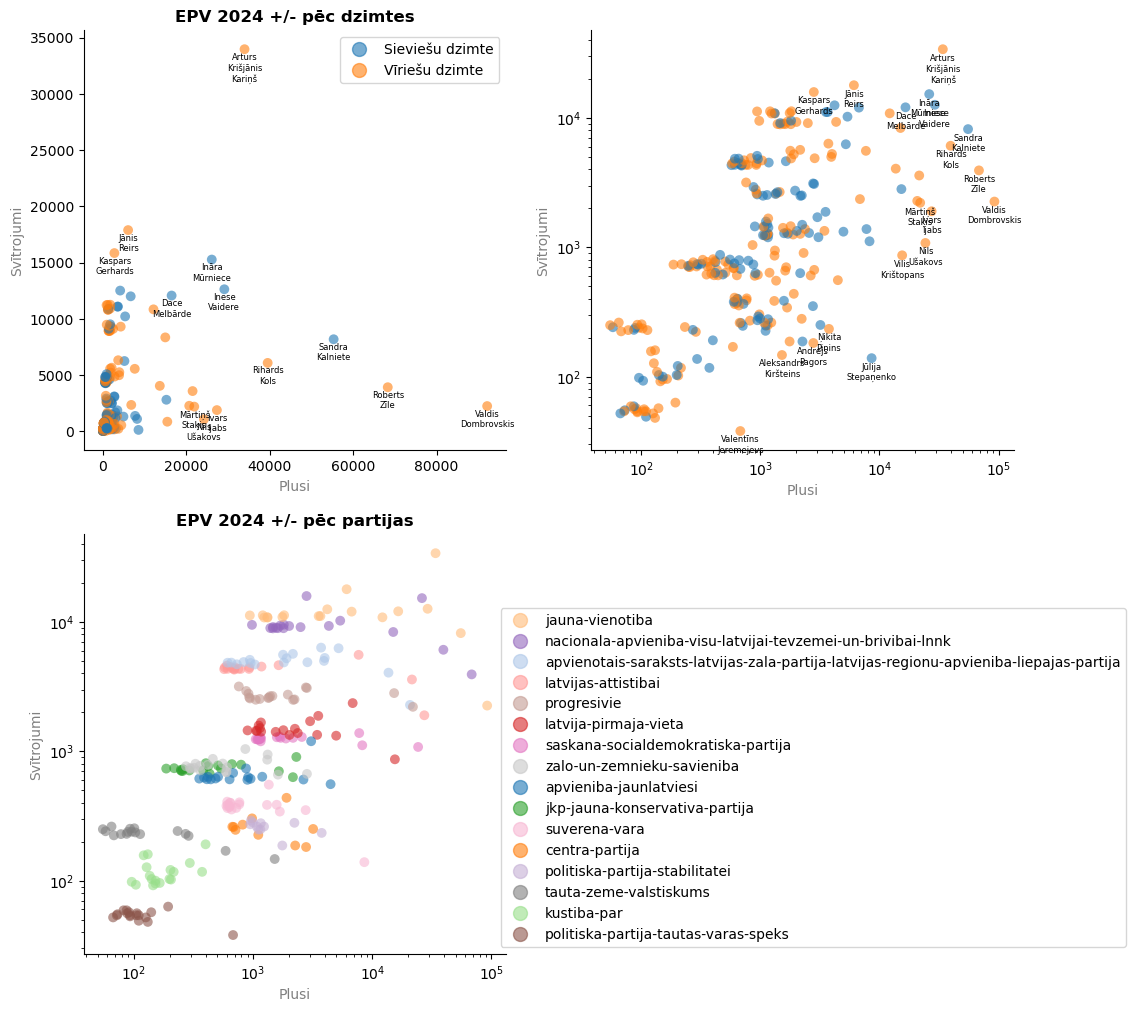

In [124]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
for col,ax in enumerate([axes[0][0],axes[0][1],axes[1][0]]):
    ax.scatter(
        df_out['Plusi'],
        df_out['Svītrojumi'],
        c=[krāsas[p] for p in df_out['Partija']] if col==2 else ['C0' if dz=='sieviešu' else 'C1' for dz in df_out['Dzimte']],
        alpha=.6,
        s=50,
        ec=None)
    ax.spines[['top','right']].set_visible(False)
    ax.set_xlabel('Plusi',c=(.5,.5,.5))
    ax.set_ylabel('Svītrojumi',c=(.5,.5,.5))
    if col > 0:
        ax.set_xscale('log')
        ax.set_yscale('log')

for i in [0,36,37,38,53,72,135,242,243,244,245,247,259]:
    current_row = df_out.iloc[i]
    axes[0][0].text(
        current_row['Plusi'],
        current_row['Svītrojumi']-300,
        current_row['Kandidāts'].replace(' ','\n'),
        ha='center', va='top', fontsize=6)
    
xmin,xmax = tuple([np.log10(x) for x in axes[0][1].get_xlim()])
ymin,ymax = tuple([np.log10(y) for y in axes[0][1].get_ylim()])
for i in [0,36,37,38,53,54,72,91,135,153,189,207,242,243,244,245,247,259,260]:
# for i in range(df_out.shape[0]):
    current_row = df_out.iloc[i]
    axes[0][1].text(
        (np.log10(current_row['Plusi'])-xmin)/(xmax-xmin),
        (np.log10(current_row['Svītrojumi'])-ymin)/(ymax-ymin)-.01,
        current_row['Kandidāts'].replace(' ','\n'),
        # str(i),
        ha='center', va='top', fontsize=6,
        transform=axes[0][1].transAxes)  
    
legend_elements = [
    Line2D([0], [0], marker='o', lw=0, alpha=.6, label='Sieviešu dzimte', color='C0', markerfacecolor='C0', markersize=10),
    Line2D([0], [0], marker='o', lw=0, alpha=.6, label='Vīriešu dzimte', color='C1', markerfacecolor='C1', markersize=10)
]
axes[0][0].legend(handles=legend_elements, loc='upper right')
axes[1][0].legend(handles=[
        Line2D([0], 
               [0], 
               marker='o', 
                lw=0,
               alpha=.6, 
               label=list(krāsas.keys())[p_index],
               color=krāsas[list(krāsas.keys())[p_index]],
               markerfacecolor=krāsas[list(krāsas.keys())[p_index]],
               markersize=10)
for p_index in [3,8,1,7,11,6,12,15,0,4,13,2,9,14,5,10]], loc='lower left', bbox_to_anchor=(.97,0))

axes[1][1].axis('off')
axes[0][0].set_title('EPV 2024 +/- pēc dzimtes',fontweight='bold')
axes[1][0].set_title('EPV 2024 +/- pēc partijas',fontweight='bold')


plt.show()

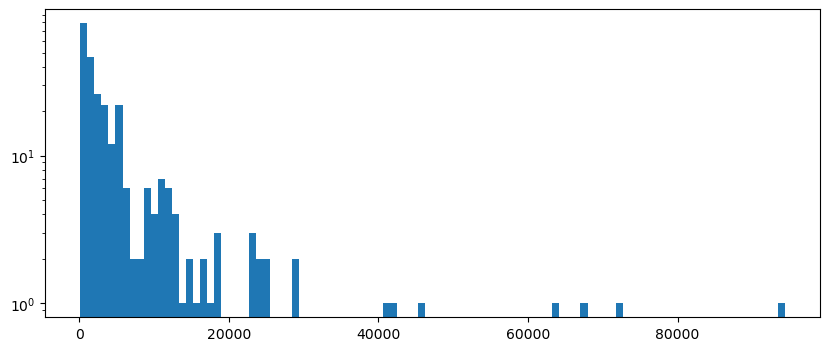

In [15]:
fig = plt.figure(figsize=(10,4))
ax = plt.gca()
ax.hist(zimes,bins=100)
ax.set_yscale('log')
plt.show()

### Grafiks 1: Histogram

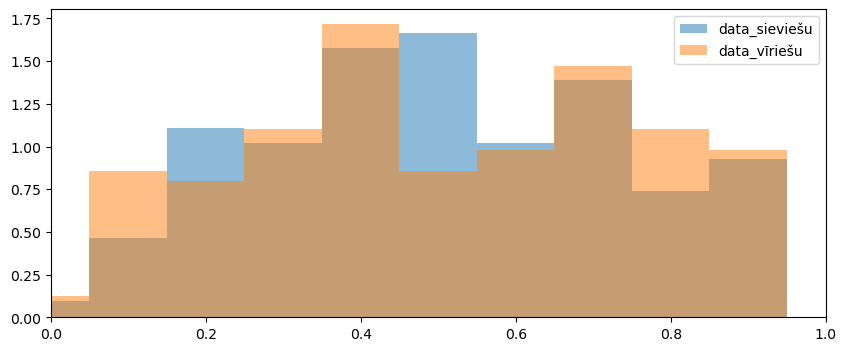

In [6]:
fig = plt.figure(figsize=(10,4))
bins = [i/10-.05 for i in range(13)]
ax = plt.gca()
ax.hist(data_sieviešu,label='data_sieviešu',alpha=.5,density=True,bins=bins)
ax.hist(data_vīriešu,label='data_vīriešu',alpha=.5,density=True,bins=bins)
#ax.hist(data_sieviešu+data_vīriešu,label='abi',alpha=.5,density=True,bins=bins)
# ax.boxplot(data_sieviešu,vert=False,positions=[1])#,label='data_sieviešu')#,alpha=.5,density=True,bins=bins)
# ax.boxplot(data_vīriešu,vert=False,positions=[0])#,label='data_vīriešu')#,alpha=.5,density=True,bins=bins)
ax.legend()
ax.set_xlim([0,1])
plt.show()

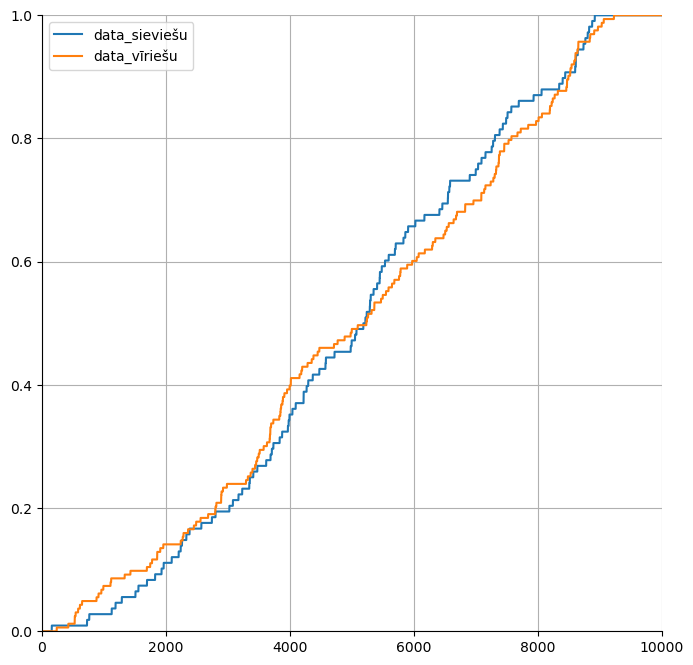

In [126]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()

s = []; v = []; resolution = 10000
for i in range(resolution+1):
    s.append(np.where(np.array(data_sieviešu)<=i/resolution)[0].shape[0]/len(data_sieviešu))
    v.append(np.where(np.array(data_vīriešu)<=i/resolution)[0].shape[0]/len(data_vīriešu))
    
ax.plot(s,label='data_sieviešu')
ax.plot(v,label='data_vīriešu')

ax.legend()
ax.set_xlim([0,resolution+1])
ax.set_ylim([0,1])
ax.spines[['top','right']].set_visible(False)
ax.grid(which='both')

plt.show()